In [1]:
import pandas as pd
import numpy as np
from os import path

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
mpl.style.use('seaborn-notebook')
#sorted(mpl.style.available)
sns.set_theme(style="whitegrid")

In [2]:
HDFStore=pd.HDFStore

Loading previously extracted features from radius and residues from Discrete Cosine Transform. They were in hdf5 format. The file contains the following datasets:

* /source/dataset: origin raw data
* /source/labels: original labels ET-1 and CT-0
* /result/radius/r: radius
* /result/radius/features: temporal and frequency fetures extracted from radius
* /result/residues/rd: residues
* /result/residues/features: temporal and frequency fetures extracted from residues


In [3]:
root_path = "/data/elekin/data"
rdo_root_path = path.join(root_path,"results/handwriting")
h5file = path.join(rdo_root_path, "archimedean-")
h5filename = h5file + str(17) + ".h5"
hdf = HDFStore(h5filename)

Loading labels based on clinic, residues and features from residues.


[Text(0, 0, 'CT'), Text(1, 0, 'ET')]

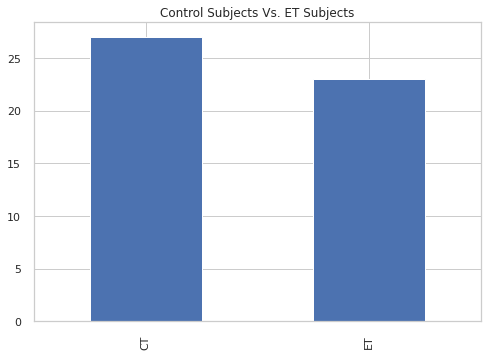

In [4]:
labels = hdf.get('source/labels')
y = labels.reset_index()['labels']
ax = y.value_counts().plot.bar(title='Control Subjects Vs. ET Subjects')
ax.set_xticklabels(["CT","ET"])

In [5]:
rd_rd = hdf['results/residues/rd']
rd_features = hdf['results/residues/features']
rd_features.head()

,mean_abs_val(L),np.var(L),root_mean_square(L),log_detector(L),wl(L),np.nanstd(L),diff_abs_std(L),higuchi(L),mfl(L),myo(L),...,mp(Pxx),tp(Pxx),meanfreq(L),medfreq(L),std_psd(Pxx),"mmnt(Pxx, order=1)","mmnt(Pxx, order=2)","mmnt(Pxx, order=3)",kurt(Pxx),skw(Pxx)
C01_11,2602.815603,1364.507135,6.776014e+06,2.123803e+12,2977.546075,36.939236,1.283325,1.082075,7.998855,0.0,...,2727.682393,5.589021e+06,0.276739,3.730807e-07,60610.057292,0.0,3.673579e+09,8.059958e+15,1439.719440,36.199176
C01_12,4074.441842,1285.863555,1.660236e+07,8.365924e+12,3000.110088,35.858940,1.923338,1.141284,8.006404,0.0,...,2570.471997,5.266897e+06,0.294032,6.032075e-04,40520.410948,0.0,1.641904e+09,2.064673e+15,1145.892789,31.033432
C02_11,2496.116675,1781.279348,6.232380e+06,5.178195e+12,4276.219835,42.205205,4.214377,1.206417,8.360825,0.0,...,3560.820014,7.296120e+06,0.307683,5.253788e-09,50928.778800,0.0,2.593741e+09,3.658466e+15,866.221542,27.695505
C02_12,3852.648277,2767.010752,1.484567e+07,1.619380e+14,3739.691230,52.602384,1.477934,1.050401,8.226758,0.0,...,5531.320664,1.133368e+07,0.289665,6.037906e-04,95167.034342,0.0,9.056764e+09,2.059373e+16,620.665923,23.893258
C03_11,2389.902540,823.506090,5.712458e+06,2.189736e+11,2983.367961,28.696796,1.491047,1.122140,8.000808,0.0,...,1646.208368,3.373081e+06,0.355573,5.025253e-06,31333.924313,0.0,9.818148e+08,1.114865e+15,1465.207915,36.239140


Extracted features. 
Pending to extract in case we needed entropy based features and autocorrelation 

In [6]:
rd_features.columns

Index(['mean_abs_val(L)', 'np.var(L)', 'root_mean_square(L)',
       'log_detector(L)', 'wl(L)', 'np.nanstd(L)', 'diff_abs_std(L)',
       'higuchi(L)', 'mfl(L)', 'myo(L)', 'iemg(L)', 'ssi(L)', 'zc(L)',
       'ssc(L)', 'wamp(L)', 'p_max(Pxx, L)', 'f_max(Pxx)', 'mp(Pxx)',
       'tp(Pxx)', 'meanfreq(L)', 'medfreq(L)', 'std_psd(Pxx)',
       'mmnt(Pxx, order=1)', 'mmnt(Pxx, order=2)', 'mmnt(Pxx, order=3)',
       'kurt(Pxx)', 'skw(Pxx)'],
      dtype='object')

See below the shape of extracted features (27), number of data points for residues and radius (4096) and total number of samples (50). In order to ensure the same number ofpoints in each sequence, we resampled all the exercises to enforce 4096 points in all of them.

In [7]:
rd_rd.shape,rd_features.shape,labels.shape

((4096, 50), (50, 27), (50,))

In [8]:
rd_rd.head()

,C01_11,C01_12,C02_11,C02_12,C03_11,C03_12,C04_11,C04_12,C05_11,C05_12,...,control2_01,control2_02,control3_01,control3_02,control4_01,control4_02,control6_01,control6_02,control7_01,control7_02
0,2616.494977,4167.778042,2316.313494,3810.389867,2267.141506,3811.550394,2514.144329,3832.845898,2347.636091,3707.240208,...,4193.309863,6574.334674,4191.963050,5282.444233,3558.557044,6786.077485,3888.301844,6250.725763,4411.832448,6398.829138
1,2603.574851,4191.983504,2255.653513,3799.250359,2249.673932,3809.392096,2512.230656,3826.680837,2339.751504,3712.954650,...,4430.562013,7320.391593,4396.594700,5430.873025,3511.725286,6437.362428,4149.861241,6450.072294,4630.891619,6613.517568
2,2615.779950,4167.788500,2288.636990,3809.251681,2266.871954,3812.793686,2514.624837,3836.820798,2350.684227,3706.004809,...,4322.135254,6218.692017,4067.671958,5196.178662,2190.141911,3460.231467,2948.009854,5806.230663,4384.771851,6458.393641
3,2624.033204,4153.906841,2338.955456,3812.917888,2277.587148,3814.089044,2515.053243,3829.918422,2350.490043,3706.053986,...,4128.512112,4422.808586,4137.566261,5273.537294,2253.531478,3820.910669,2317.872666,6212.651716,4211.209099,6423.570700
4,2618.051843,4166.734844,2346.077098,3804.898521,2268.662020,3812.806864,2513.576047,3831.296303,2344.732659,3711.564083,...,3995.638968,3521.575215,4223.443676,5346.559807,2201.812622,3612.850661,2473.159124,4980.445584,3808.837960,6583.185559


## Features Analysis based on Pearson Correlation

As the first step we can try to visualy identify correlation between features and also with target class

In [9]:
df=rd_features.join(labels)
corrMatrix = df.corr("pearson")
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

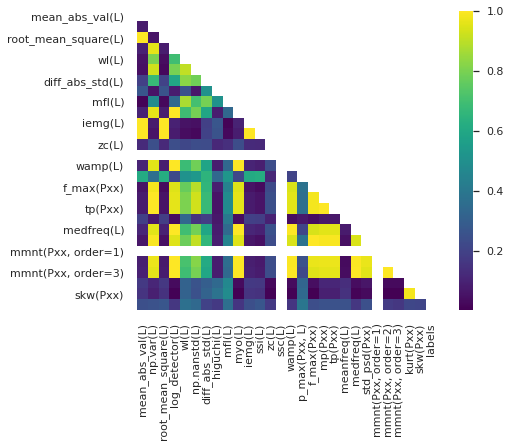

In [10]:
_ = sns.heatmap(corrMatrix.abs(), mask=mask, square=True, cmap="viridis")

There are no strong correlation with target variables even though some of the features are strongly correlated. Let's analyce the most correlated variables with target.

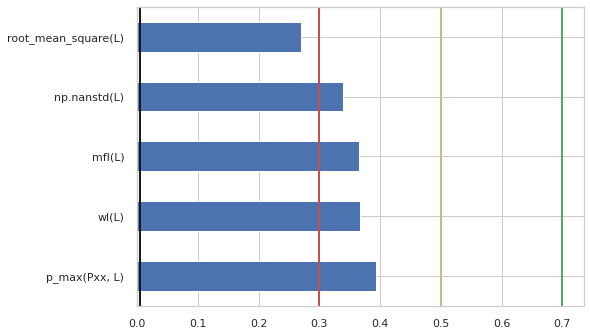

In [11]:
top5 = corrMatrix.abs().labels.sort_values(ascending=False)[0:6]
top5[1:6].plot.barh()
plt.plot([0.7, 0.7],[-1.0,10.0], 'g-', lw=2)
plt.plot([0.5, 0.5],[-1.0,10.0], 'y-', lw=2)
plt.plot([0.3, 0.3],[-1.0,10.0], 'r-', lw=2)
_=plt.plot([0.005, 0.005],[-1.0,10.0], 'k-', lw=2)

Pearson correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. We did not fing strongly correlated features with target variables.

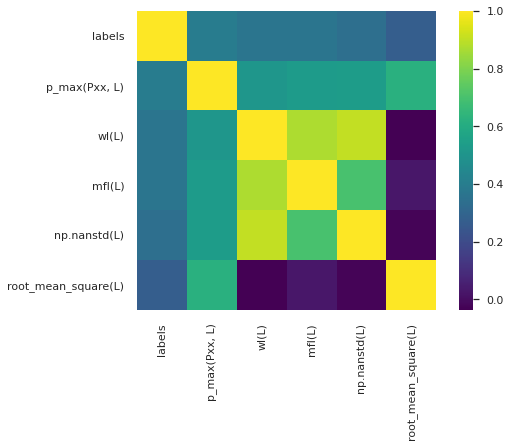

In [12]:
_=sns.heatmap(corrMatrix[top5.index].loc[top5.index], square=True, cmap="viridis")

In [13]:
r_r = hdf['results/radius/r']
r_features = hdf['results/radius/features']
r_features.head()

,mean_abs_val(L),np.var(L),root_mean_square(L),log_detector(L),wl(L),np.nanstd(L),diff_abs_std(L),higuchi(L),mfl(L),myo(L),...,mp(Pxx),tp(Pxx),meanfreq(L),medfreq(L),std_psd(Pxx),"mmnt(Pxx, order=1)","mmnt(Pxx, order=2)","mmnt(Pxx, order=3)",kurt(Pxx),skw(Pxx)
C01_11,6318.005926,360480.747007,4.027768e+07,2.004085e+24,14469.757317,600.400489,7.707199,1.092907,9.579816,0.0,...,720609.633842,1.476529e+09,0.251363,1.920122e-05,2.174840e+07,0.0,4.729928e+14,3.904528e+23,1525.313605,37.956548
C01_12,9860.596748,346912.449112,9.757828e+07,2.949816e+25,15346.030357,588.992741,11.871390,1.149401,9.638612,0.0,...,693486.281876,1.420953e+09,0.250975,6.448504e-04,2.079210e+07,0.0,4.323114e+14,3.107595e+23,1245.580903,34.572386
C02_11,6065.495646,363578.386429,3.715382e+07,1.597639e+24,12838.982400,602.974615,7.085169,1.085192,9.460241,0.0,...,726801.889123,1.489217e+09,0.251435,4.424347e-08,1.963125e+07,0.0,3.853862e+14,2.780988e+23,1474.823342,36.758256
C02_12,9325.660255,359299.805894,8.732724e+07,2.421750e+25,15157.010512,599.416221,10.572957,1.126025,9.626218,0.0,...,718248.904315,1.471692e+09,0.253005,6.158674e-04,1.880496e+07,0.0,3.536265e+14,2.128948e+23,1088.478758,32.014583
C03_11,5809.378877,346921.393913,3.409580e+07,9.879311e+23,12715.580607,589.000334,7.507214,1.094602,9.450583,0.0,...,693504.162746,1.420990e+09,0.253550,1.465746e-04,2.194374e+07,0.0,4.815277e+14,4.410212e+23,1813.342624,41.737611


In [14]:
df=r_features.join(labels)
corrMatrix = df.corr("pearson")
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

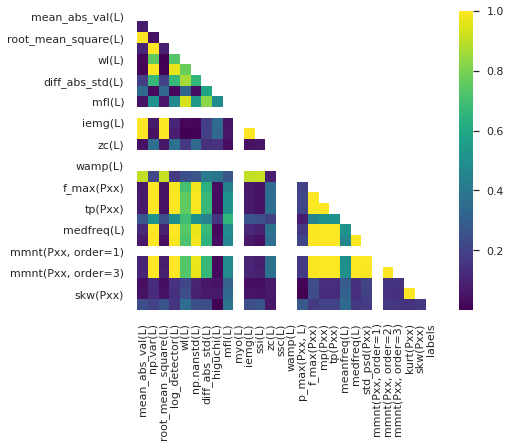

In [15]:
_ = sns.heatmap(corrMatrix.abs(), mask=mask, square=True, cmap="viridis")

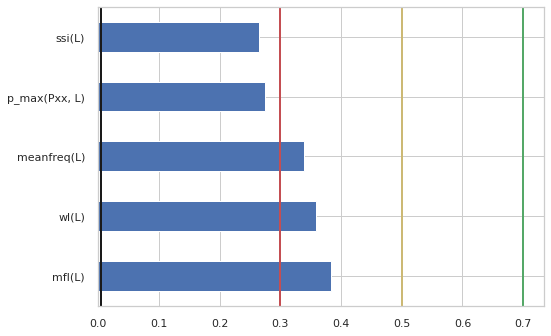

In [16]:
top5 = corrMatrix.abs().labels.sort_values(ascending=False)[0:6]
top5[1:6].plot.barh()
plt.plot([0.7, 0.7],[-1.0,10.0], 'g-', lw=2)
plt.plot([0.5, 0.5],[-1.0,10.0], 'y-', lw=2)
plt.plot([0.3, 0.3],[-1.0,10.0], 'r-', lw=2)
_=plt.plot([0.005, 0.005],[-1.0,10.0], 'k-', lw=2)

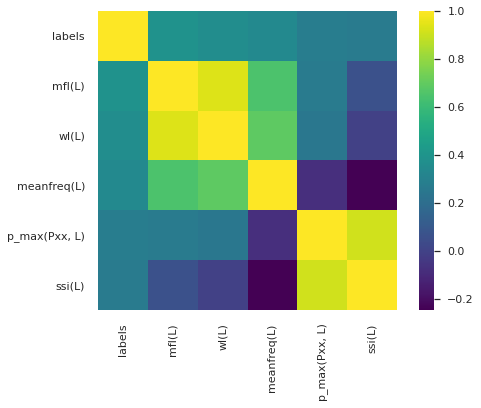

In [17]:
_=sns.heatmap(corrMatrix[top5.index].loc[top5.index], square=True, cmap="viridis")

## Relief-Based Feature Selection
For details on the algorithmic differences between the various Relief algorithms, please refer to [this research paper](https://arxiv.org/abs/1711.08477)

After applying ReliefF we obtained the scoring of the importance for each variable according to the ReliefF scoring process.

### Residue method:

#### ReliefF

1. Difference Absolute standard deviation (diff_abs_std)
2. Maximum fractal length (mfl)
3. Fractal dimension (higuchi)
4. Waveform length (wl) 
5. skewness (SKW)

#### RFE and ReliefF

1. Difference Absolute standard deviation (diff_abs_std)
3. Fractal dimension (higuchi)
2. Maximum fractal length (mfl)
4. Mean Frequency (meanfreq) 
5. skewness (SKW)



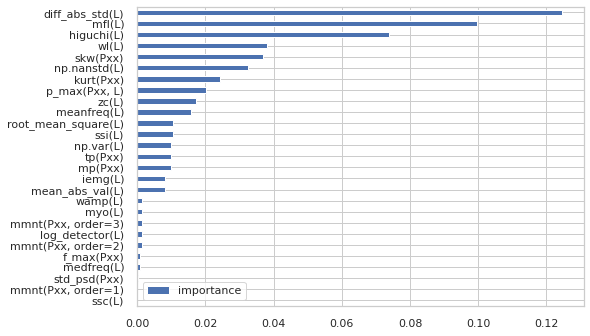

In [18]:
from skrebate import ReliefF

fltr = ReliefF(n_features_to_select=5)
fs = fltr.fit(rd_features.values, labels.values)
_=pd.DataFrame(fs.feature_importances_, rd_features.columns, columns=["importance"]).abs().sort_values("importance", ascending=True).plot.barh()

In [19]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = make_pipeline(ReliefF(n_features_to_select=5, n_neighbors=100),
                    RandomForestClassifier(50))

print(np.mean(cross_val_score(clf, rd_features.values, labels.values)))

0.58


### Radius method:

#### ReliefF

1. Zero crossing (zc)
2. Fractal dimension (higuchi)
3. Difference Absolute standard deviation (diff_abs_std)
4. Maximum Fractal Length (mfl) 
5. Kurtosis (kurt)

#### RFE and ReliefF

1. Mean absolute value (mean_abs_val), 
2. Difference Absolute standard deviation (diff_abs_std)
3. Fractal dimension (higuchi)
4. Maximum Fractal Length (mflL)
5. Zero Crossing (zc)


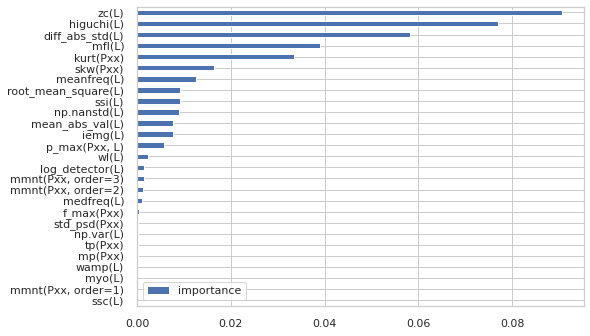

In [20]:
fltr = ReliefF(n_features_to_select=5)
fs = fltr.fit(r_features.values, labels.values)
_=pd.DataFrame(fs.feature_importances_, r_features.columns, columns=["importance"]).abs().sort_values("importance", ascending=True).plot.barh()

In [21]:
clf = make_pipeline(ReliefF(n_features_to_select=5, n_neighbors=100),
                    RandomForestClassifier(15))

print(np.mean(cross_val_score(clf, r_features.values, labels.values)))

0.58


## Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [22]:
from sklearn.feature_selection import RFE
print(RFE.__doc__)

Feature ranking with recursive feature elimination.

    Given an external estimator that assigns weights to features (e.g., the
    coefficients of a linear model), the goal of recursive feature elimination
    (RFE) is to select features by recursively considering smaller and smaller
    sets of features. First, the estimator is trained on the initial set of
    features and the importance of each feature is obtained either through
    any specific attribute or callable.
    Then, the least important features are pruned from current set of features.
    That procedure is recursively repeated on the pruned set until the desired
    number of features to select is eventually reached.

    Read more in the :ref:`User Guide <rfe>`.

    Parameters
    ----------
    estimator : ``Estimator`` instance
        A supervised learning estimator with a ``fit`` method that provides
        information about feature importance
        (e.g. `coef_`, `feature_importances_`).

    n_features_to_se

In [23]:
selector = RFE(ReliefF(), n_features_to_select=5)
selector_rd = selector.fit(rd_features.values, labels.values)
idx_rd = np.where(selector_rd.ranking_ == 1)
rd_features.columns[idx_rd]

Index(['diff_abs_std(L)', 'higuchi(L)', 'mfl(L)', 'meanfreq(L)', 'skw(Pxx)'], dtype='object')

The density plots on the diagonal make it easier to compare distributions between the clinic (ET) and controls (CT) subjects than stacked bars. Unfortunately, even though we are working with more important variables there are not strong differences between ET and CT

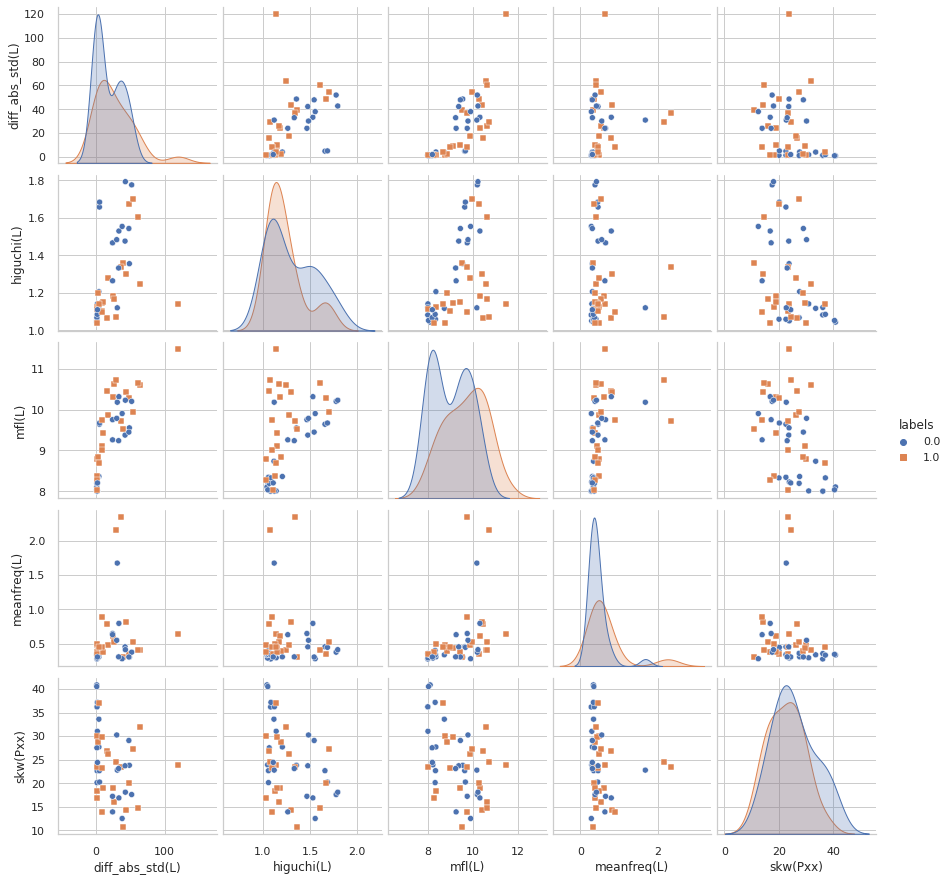

In [24]:
_=sns.pairplot(rd_features[rd_features.columns[idx_rd]].join(labels), hue="labels", markers=["o", "s"])

In [25]:
clf = make_pipeline(selector_rd,
                    RandomForestClassifier(n_estimators=15))

print(np.mean(cross_val_score(clf, rd_features.values, labels.values)))

0.52


In [26]:
selector_r = selector.fit(r_features.values, labels.values)
idx_r = np.where(selector_r.ranking_ == 1)
r_features.columns[idx_r]

Index(['mean_abs_val(L)', 'diff_abs_std(L)', 'higuchi(L)', 'mfl(L)', 'zc(L)'], dtype='object')

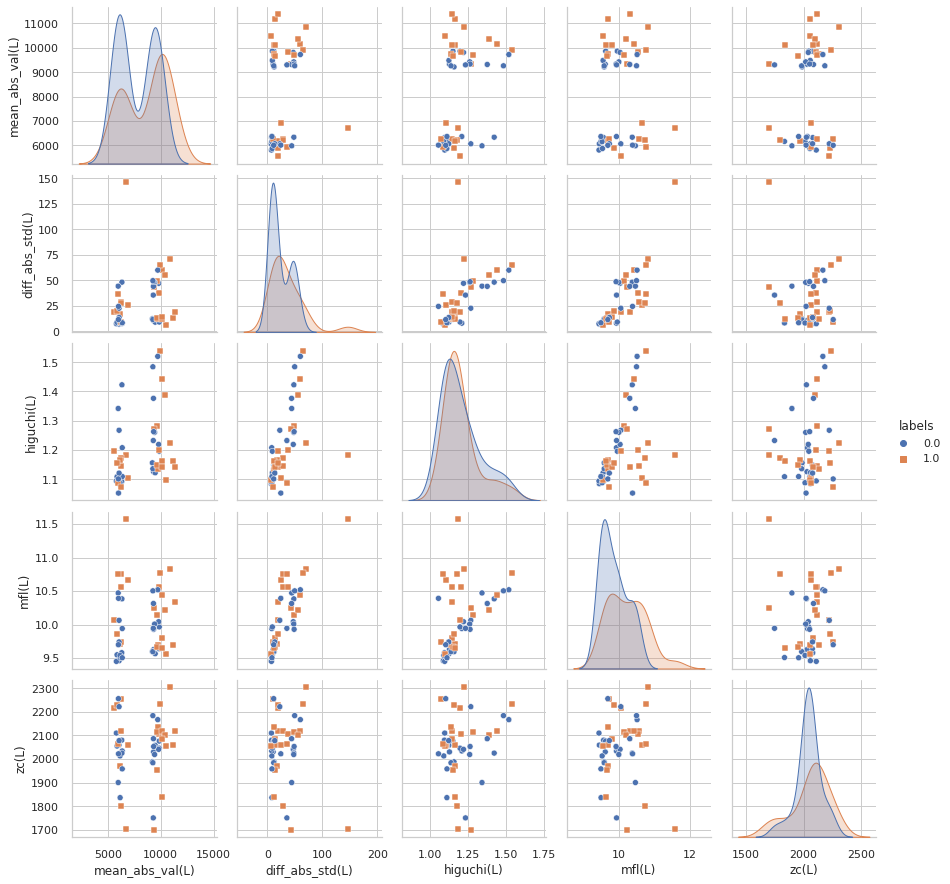

In [27]:

_=sns.pairplot(r_features[r_features.columns[idx_r]].join(labels), hue="labels", markers=["o", "s"])


In [28]:
clf = make_pipeline(selector_r,
                    RandomForestClassifier(n_estimators=15))

print(np.mean(cross_val_score(clf, r_features.values, labels.values)))

0.5599999999999999


In [29]:
r_features.shape

(50, 27)

## Classification system

To evaluate the performance of these algorithms we implemented the leave-one-out technique. Although all the drawing samples have been done with a template and the same pen tablet, the number of drawing points acquired was different for each sample. Linear Discriminant analysis (LDA), k-nearest neighbors (k- NN) and support vector machine (SVM) with radial basis kernel have been used as classification algorithm to discriminate between ET and control subjects. To

In [30]:
#adding local modules
import sys
from os import path

module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis.clf_loo import analysis_loo

In [31]:
X=rd_features
analysis_loo(X, y) 

train score svm
1.0
test score svm
0.74
train score Random forest
0.9967346938775511
test score Random forest
0.64
train score Knn
0.7016326530612246
test score Knn
0.48
train score LDA
0.6844897959183673
test score LDA
0.54


In [32]:
X=r_features
analysis_loo(X, y) 

train score svm
1.0
test score svm
0.54
train score Random forest
0.9975510204081632
test score Random forest
0.6
train score Knn
0.6848979591836735
test score Knn
0.42
train score LDA
0.6730612244897959
test score LDA
0.44


In [33]:
hdf.close()